# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


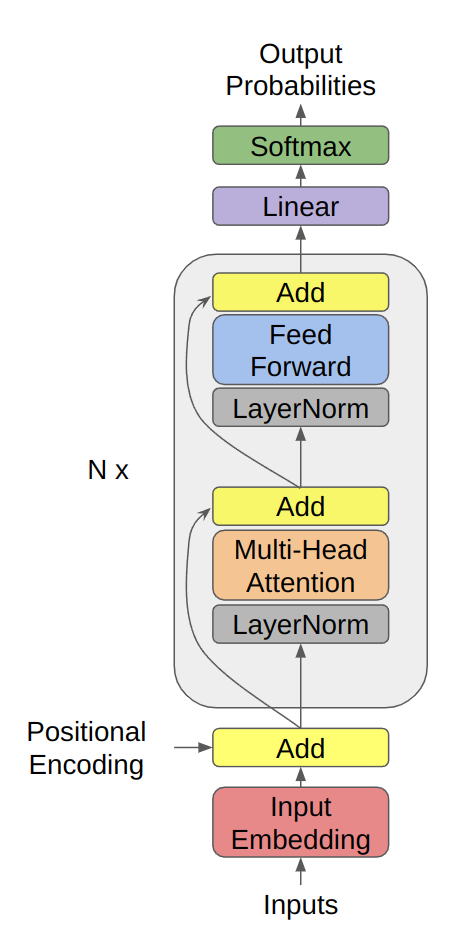

# Tools

In [164]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from collections import namedtuple

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [165]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [166]:
import string

Edge = namedtuple("Edge", "to token prob")

In [167]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [168]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [169]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [170]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [171]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [172]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [173]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 9, 1, 7, 6, 0, 9, 1, 7, 6, 0, 9, 1, 7, 6, 0, 9, 0, 9, 1, 7, 6, 0, 9,
        1, 7, 6, 0, 9, 0, 9, 1, 7, 8, 3, 8, 3, 4, 2, 3, 8, 3, 4, 2, 5, 4, 5, 4,
        5, 4, 2, 3, 8, 3, 8, 3, 8, 3, 8, 3, 4, 2, 5, 6])
tensor([0, 3, 1, 8, 4, 7, 0, 3, 4, 5, 6, 6, 6, 6, 6, 6, 7, 0, 3, 1, 8, 9, 9, 9,
        0, 3, 1, 8, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        7, 0, 3, 4, 7, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([0, 5, 6, 3, 4, 5, 1, 9, 0, 5, 1, 9, 0, 5, 1, 2, 3, 4, 7, 4, 7, 4, 7, 4,
        7, 4, 7, 4, 7, 4, 7, 4, 5, 1, 9, 0, 5, 1, 2, 6, 3, 2, 6, 3, 4, 7, 4, 7,
        4, 7, 4, 7, 8, 8, 8, 8, 9, 0, 5, 1, 2, 6, 3, 4])
tensor([0, 9, 8, 9, 8, 4, 1, 5, 3, 7, 0, 9, 8, 4, 1, 5, 3, 7, 0, 9, 8, 4, 1, 5,
        6, 6, 6, 6, 7, 8, 4, 1, 5, 3, 7, 0, 1, 5, 3, 7, 0, 9, 8, 4, 1, 5, 3, 4,
        5, 3, 7, 8, 4, 1, 5, 3, 7, 0, 1, 5, 3, 7, 0, 9])
tensor([0, 2, 5, 6, 1, 8, 7, 4, 6, 7, 4, 6, 1, 2, 5, 3, 9, 0, 2, 5, 6, 1, 8, 7,
        4, 6, 1, 8, 7, 4, 6, 1, 8, 7, 4, 6, 1, 8, 7,

In [174]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)

Below you can find some visualizations of the data.

[0, 5, 6, 0, 1, 7, 8, 9, 1, 7, 8, 9, 0, 1, 7, 8, 9, 1, 7, 8, 9, 1, 7, 8, 9, 0, 5, 6, 0, 5, 6, 7, 8, 9, 1, 7, 8, 9, 0, 5, 6, 7, 8, 9, 0, 1, 7, 8, 9, 1, 7, 8, 9, 0, 5, 6, 7, 8, 9, 1, 7, 8, 9, 0]


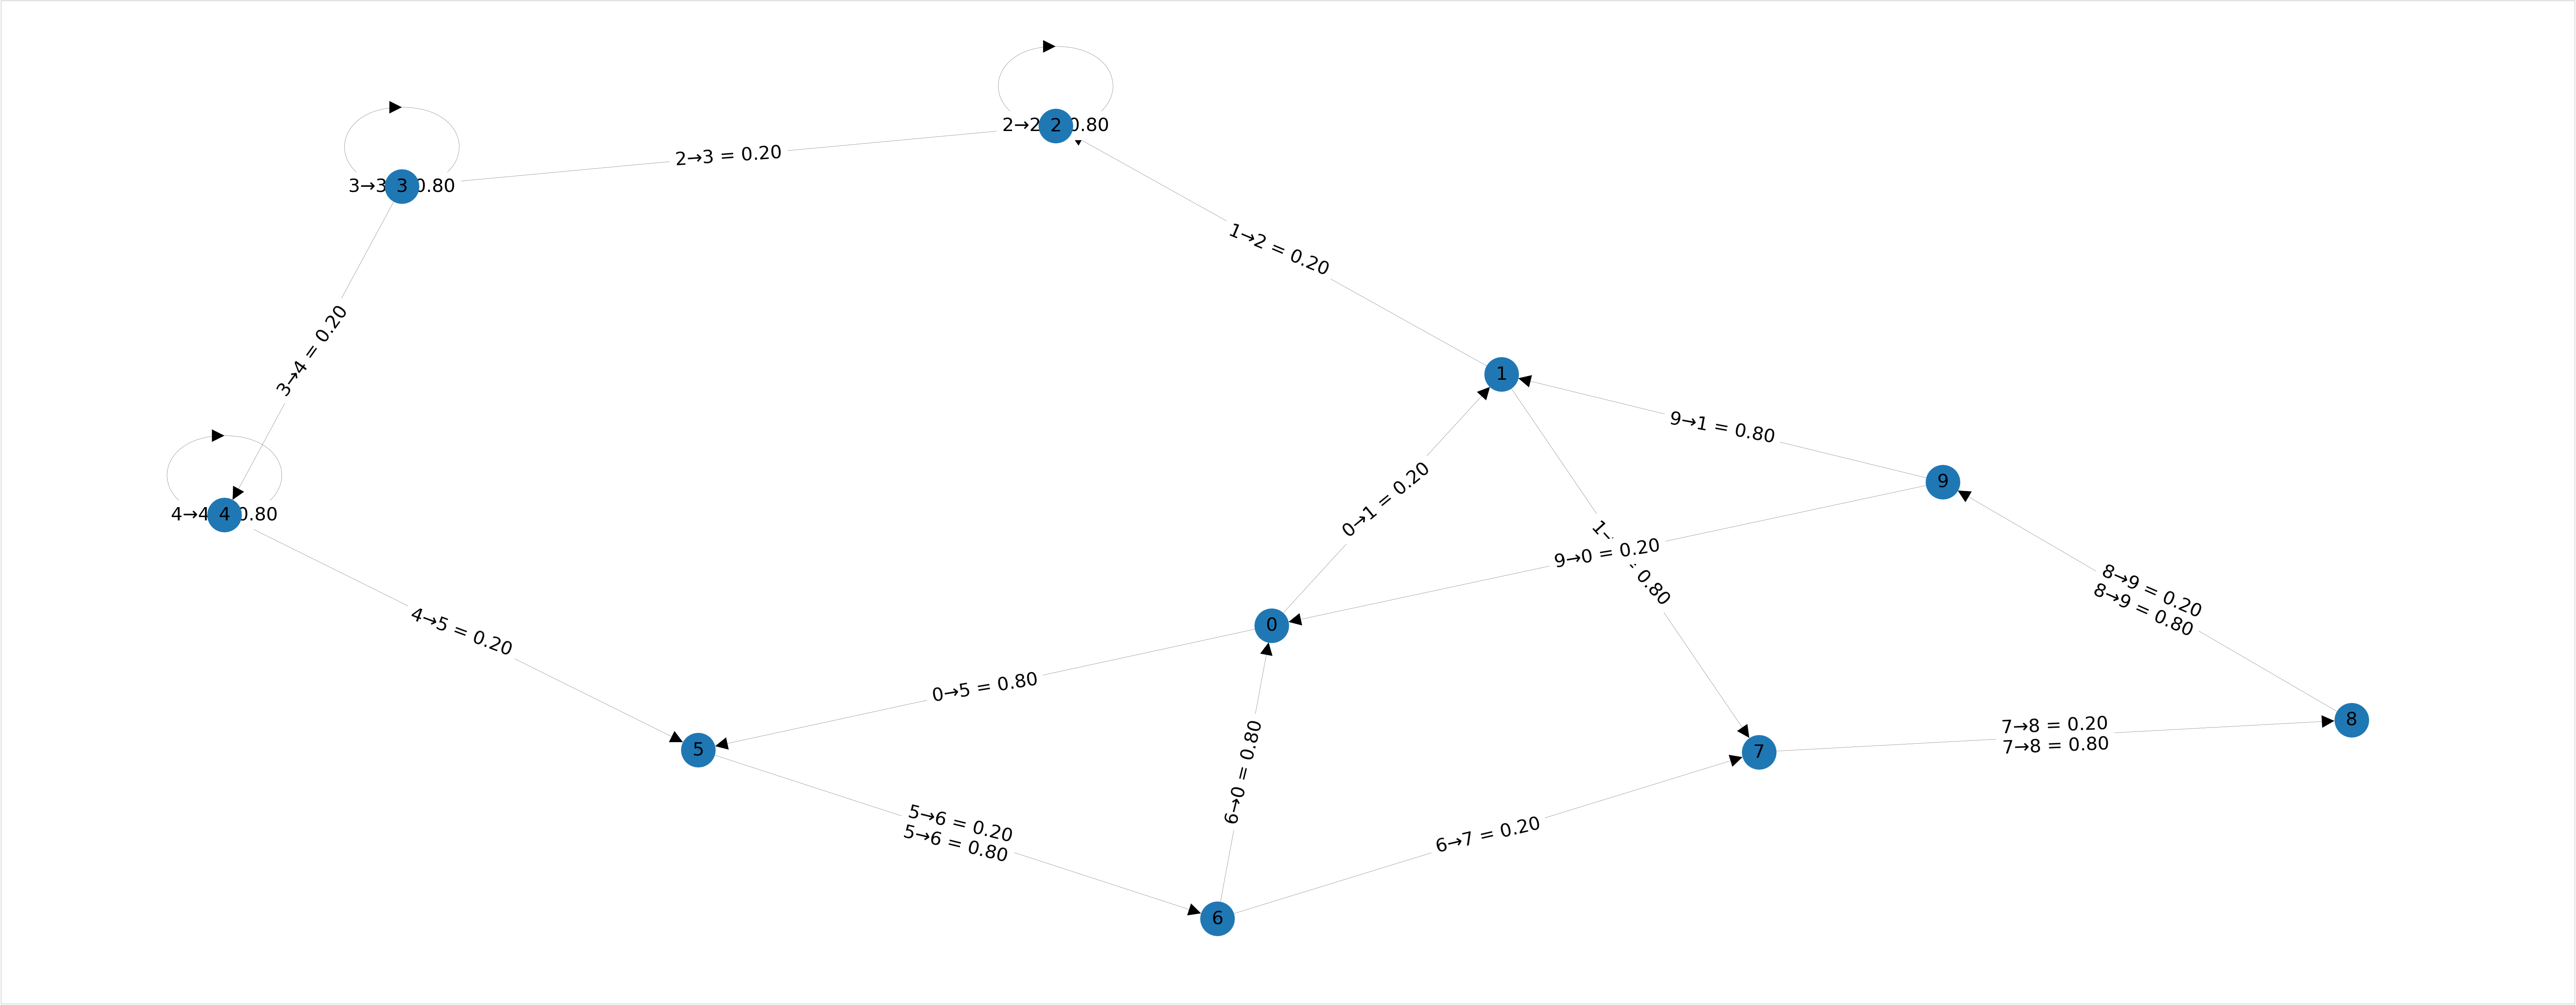

In [175]:
graph = generate_pseudo_permutation(10, true_prob=0.8)
plot_graph(graph)
data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
print(data)

# Main part

In [176]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Ok we have cuda capable device


Before implementing the Transformer part of the model, you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [177]:
def stable_softmax(x, mask, dim):
    max_x, _ = torch.max(x, dim=dim, keepdim=True)
    exp_x = torch.exp(x - max_x)
    exp_x = exp_x * mask
    sum_exp_x = torch.sum(exp_x, dim=dim, keepdim=True)
    sm_x = torch.div(exp_x, sum_exp_x)
    return sm_x


test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)

#assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),stable_softmax(test_input, dim=-1)).all()
#assert torch.isclose(stable_softmax(test_input, dim=-1),torch.nn.functional.softmax(test_input, dim=-1)).all()
#assert torch.isclose(stable_softmax(test_input, dim=-2), torch.nn.functional.softmax(test_input, dim=-2)).all()
#assert torch.isclose(stable_softmax(test_input, dim=0), torch.nn.functional.softmax(test_input, dim=0)).all()

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [178]:
import math

MHACache = namedtuple("MHACache", "k v")

def casual_mask(size1, size2):
    mask = 1 - torch.triu(torch.ones([size1, size2]), diagonal=1)
    mask = torch.reshape(mask, [size1, size2, 1, 1])
    return mask


class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
      super().__init__()
      self.d_model = d_model
      self.num_heads = num_heads
      self.d_head = d_head

      self.hidden_dim = d_head * num_heads
      self.scale = np.sqrt(d_head)

      self.to_q = nn.Linear(d_model, self.hidden_dim)
      self.to_k = nn.Linear(d_model, self.hidden_dim)
      self.to_v = nn.Linear(d_model, self.hidden_dim)
      self.to_output = torch.nn.Linear(self.hidden_dim, d_model)

    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))

    def forward(self, x, cache):
      """
        x input of shape (seq, batch_size, d_model).

        cache is a MHACache object consisting of keys and values
          of shape (seq', batch_size, head, d_head)

      Returns the result of the attention computation along with the updated
      cache. The attention is calculated separately for each head. The attention
      mechanism used is decoder-style, which means that an element can only
      attend to itself and elements that precede it (including elements in the
      cache). The new cache is created by extending the old cache with the new
      keys and values computed for each head of x.
      """
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model

      assert len(cache.k.shape) == 4  # seq', batch, head, d_head
      assert cache.k.shape == cache.v.shape
      assert cache.k.shape[1] == x.shape[1]
      assert cache.k.shape[2] == self.num_heads
      assert cache.k.shape[3] == self.d_head
      # TODO
      seq, batch = x.shape[0], x.shape[1]

      k = self.to_k(x).reshape([seq, batch, self.num_heads, self.d_head])
      v = self.to_v(x).reshape([seq, batch, self.num_heads, self.d_head])
      q = self.to_q(x).reshape([seq, batch, self.num_heads, self.d_head])

      k = torch.cat((cache.k, k))
      v = torch.cat((cache.v, v))

      logits = torch.einsum('ibhd,jbhd->ijbh', q, k) / self.scale
      mask = casual_mask(seq, k.shape[0]).to(DEVICE)
      
      attn = stable_softmax(logits, mask, dim=1)
      
      z = torch.einsum("ijbh,jbhd->ibhd", attn, v)
      z = z.reshape(seq, batch, -1)
      res = self.to_output(z)

      new_cache = MHACache(k=k, v=v)

      assert res.shape == x.shape
      return res, new_cache

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [179]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
      super().__init__()
      self.layer1 = nn.Linear(d_model, d_ff)
      self.layer2 = nn.Linear(d_ff, d_model)
      self.d_model = d_model 
      self.d_ff = d_ff

    def forward(self, x):
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      # TODO
      x = self.layer1(x)
      x = nn.functional.relu(x)
      x = self.layer2(x)

      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      return x



Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [180]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
      super().__init__()
      # TODO
      self.layer_norm1 = nn.LayerNorm(d_model)
      self.mha = MultiHeadAttention(d_model, num_heads, d_head)
      self.layer_norm2 = nn.LayerNorm(d_model)
      self.ff = FeedForward(d_model, d_ff)


    def get_empty_cache(self, batch_size):
        return self.mha.get_empty_cache(batch_size)

    def forward(self, x, cache):
      # TODO
      to_add = x
      x = self.layer_norm1(x)
      x, cache = self.mha(x, cache)
      x = torch.add(x, to_add)
      to_add = x
      x = self.layer_norm2(x)
      x = self.ff(x)
      x = torch.add(x, to_add)
      return x, cache

Implement positional encoding.

In [181]:
def get_positional_encoding(seqlen, hiddendim):
  """
  Returns a matrix P of shape (seqlen, hiddendim) where
  P[i] should be added to the ith element of the input sequence 
  as positional encoding.
  """
  # TODO: implement positional encoding
  encodings = torch.zeros(seqlen, hiddendim)
  position = torch.arange(0, seqlen, dtype=torch.float32).unsqueeze(1)
  two_i = torch.arange(0, hiddendim, 2, dtype=torch.float32)
  
  div_term = torch.exp(two_i * -(math.log(10000.0) / hiddendim))
  encodings[:, 0::2] = torch.sin(position * div_term)
  encodings[:, 1::2] = torch.cos(position * div_term)
  # output shape: (seqlen, hiddendim)
  return encodings.to(DEVICE)

Decoder is already implemented below.

In [182]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for i in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(
            d_model, vocab_size, bias=True)

    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)
        if POSITIONAL:
          x = x + get_positional_encoding(x.shape[0]+offset, self.d_model)[offset:, None, :]

        new_cache = []
        for l, c in zip(self.dec_layers, cache):
            x, nc = l(x, c)
            new_cache.append(nc)

        x = self.output_layer(x)
        return torch.distributions.Categorical(logits=x), new_cache


## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [183]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
  return dist.sample()


def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        total += np.prod(y.shape)

    return total_correct/total

In [184]:
def train(model, train_loader, test_loader, num_epoches):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    acc_list = []
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        acc_list.append(acc)
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")
    return acc_list


Train the model on the dataset.

In [185]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model.to(DEVICE)
acc_4layers = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.1606754834138893 acc:0.3275
EPOCH 1 loss:1.885472830337814 acc:0.5237
EPOCH 2 loss:1.0099079465564293 acc:0.6974
EPOCH 3 loss:0.824276445032675 acc:0.7073
EPOCH 4 loss:0.7844657452800606 acc:0.7116
EPOCH 5 loss:0.7612277359902104 acc:0.7150
EPOCH 6 loss:0.7459771391711657 acc:0.7174
EPOCH 7 loss:0.7356350851964347 acc:0.7191
EPOCH 8 loss:0.7281427353243285 acc:0.7200
EPOCH 9 loss:0.7223190325724927 acc:0.7202
EPOCH 10 loss:0.7178308420543429 acc:0.7200
EPOCH 11 loss:0.7145528212378297 acc:0.7198
EPOCH 12 loss:0.7120003074030333 acc:0.7205
EPOCH 13 loss:0.7085832274412807 acc:0.7202
EPOCH 14 loss:0.7061309972895852 acc:0.7205
EPOCH 15 loss:0.703643599642983 acc:0.7213
EPOCH 16 loss:0.7016716923894761 acc:0.7217
EPOCH 17 loss:0.7002289340465884 acc:0.7211
EPOCH 18 loss:0.6989362926422795 acc:0.7216
EPOCH 19 loss:0.6970208030712756 acc:0.7229
EPOCH 20 loss:0.6946348268774492 acc:0.7225
EPOCH 21 loss:0.6925363502924955 acc:0.7216
EPOCH 22 loss:0.6910326737391798 acc:0.7216
E

Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

In [186]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201)

EPOCH 0 loss:2.5441946983337402 acc:0.1064
EPOCH 1 loss:2.4962127208709717 acc:0.0972
EPOCH 2 loss:2.414816379547119 acc:0.0923
EPOCH 3 loss:2.394237995147705 acc:0.0934
EPOCH 4 loss:2.3667755126953125 acc:0.0919
EPOCH 5 loss:2.337522268295288 acc:0.0959
EPOCH 6 loss:2.3222579956054688 acc:0.0895
EPOCH 7 loss:2.319552183151245 acc:0.0917
EPOCH 8 loss:2.31992769241333 acc:0.0928
EPOCH 9 loss:2.3179895877838135 acc:0.0955
EPOCH 10 loss:2.3136022090911865 acc:0.0989
EPOCH 11 loss:2.307983875274658 acc:0.0972
EPOCH 12 loss:2.3014371395111084 acc:0.0942
EPOCH 13 loss:2.29464054107666 acc:0.0975
EPOCH 14 loss:2.289092779159546 acc:0.0975
EPOCH 15 loss:2.2854013442993164 acc:0.0995
EPOCH 16 loss:2.2826805114746094 acc:0.1006
EPOCH 17 loss:2.2797446250915527 acc:0.0978
EPOCH 18 loss:2.2762808799743652 acc:0.0983
EPOCH 19 loss:2.2726407051086426 acc:0.0995
EPOCH 20 loss:2.269284248352051 acc:0.0977
EPOCH 21 loss:2.2665202617645264 acc:0.0967
EPOCH 22 loss:2.2643189430236816 acc:0.0942
EPOCH 23 

[0.10640625,
 0.0971875,
 0.09234375,
 0.0934375,
 0.091875,
 0.0959375,
 0.08953125,
 0.09171875,
 0.0928125,
 0.09546875,
 0.09890625,
 0.0971875,
 0.09421875,
 0.0975,
 0.0975,
 0.09953125,
 0.100625,
 0.0978125,
 0.09828125,
 0.09953125,
 0.09765625,
 0.09671875,
 0.09421875,
 0.09625,
 0.098125,
 0.09875,
 0.09734375,
 0.0984375,
 0.09828125,
 0.09765625,
 0.0996875,
 0.09953125,
 0.09875,
 0.0978125,
 0.0990625,
 0.10046875,
 0.10078125,
 0.10015625,
 0.0996875,
 0.09984375,
 0.09921875,
 0.09796875,
 0.09859375,
 0.09828125,
 0.09859375,
 0.09921875,
 0.101875,
 0.1,
 0.09953125,
 0.0978125,
 0.0984375,
 0.098125,
 0.09890625,
 0.0984375,
 0.10109375,
 0.10203125,
 0.100625,
 0.10125,
 0.1015625,
 0.10078125,
 0.10140625,
 0.10171875,
 0.10125,
 0.1028125,
 0.10125,
 0.1025,
 0.10296875,
 0.101875,
 0.104375,
 0.0975,
 0.10453125,
 0.10421875,
 0.10125,
 0.1028125,
 0.10140625,
 0.1009375,
 0.1,
 0.103125,
 0.10140625,
 0.10296875,
 0.10125,
 0.10265625,
 0.10171875,
 0.105,
 0.

Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

In [187]:
ti = iter(TEST_LOADER)
test = [i for i in ti]
x, y = test[0]
x = x[0].reshape([1,64])
x = x.to(DEVICE).swapdims(0, 1)
dist, cache = model(x, model.get_empty_cache(x.shape[1]))
for i in dist.probs.squeeze():
  print(i.cpu().detach().numpy())

[0.07419135 0.22895293 0.11454047 0.093372   0.06734688 0.08220699
 0.08116293 0.09102719 0.09276577 0.07443357]
[0.74056506 0.22683589 0.00954058 0.00308106 0.00258991 0.00347354
 0.00324767 0.00272494 0.004766   0.00317534]
[7.82073796e-01 2.16876522e-01 4.02044709e-04 6.33551608e-05
 5.00414499e-05 1.56178110e-04 8.78373685e-05 6.24191089e-05
 1.08283406e-04 1.19496537e-04]
[7.6176387e-01 2.3784359e-01 1.3732110e-04 1.5973375e-05 2.5312087e-05
 8.4097919e-05 2.9073582e-05 3.1500047e-05 3.1335287e-05 3.7888480e-05]
[7.42251873e-01 2.57414043e-01 1.09591885e-04 1.48776608e-05
 3.20020081e-05 8.21982685e-05 1.76365520e-05 2.99116473e-05
 2.38435987e-05 2.39705478e-05]
[4.14869974e-05 7.82873631e-02 3.06389481e-01 1.07525900e-01
 8.14820528e-02 1.10286064e-01 7.27667138e-02 6.84667006e-02
 8.70487243e-02 8.77055079e-02]
[1.67811377e-04 1.21606104e-01 7.37349615e-02 3.07216309e-04
 3.43541533e-01 1.24888718e-01 7.69012868e-02 9.38300341e-02
 1.06008634e-01 5.90137094e-02]
[4.41440397e-06

One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ_LEN}]$ average model accuracy. Assume that we take the most probable answer.

In [188]:
def eval2(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = torch.zeros([64])
    i = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += torch.sum((model_ans == y), dim=1).cpu() / model_ans.shape[1]
        i+=1

    return total_correct/i


print(eval2(model, TEST_LOADER))

tensor([0.2932, 0.3326, 0.3709, 0.4286, 0.4540, 0.4653, 0.5042, 0.5404, 0.5437,
        0.5832, 0.5997, 0.6357, 0.6372, 0.6852, 0.6946, 0.6971, 0.7120, 0.7106,
        0.7259, 0.7670, 0.7366, 0.7305, 0.7028, 0.7622, 0.7632, 0.7848, 0.7522,
        0.7709, 0.7744, 0.7865, 0.7921, 0.7782, 0.7904, 0.7626, 0.7895, 0.7861,
        0.7793, 0.7933, 0.8050, 0.7938, 0.8049, 0.7946, 0.8107, 0.7926, 0.8165,
        0.7951, 0.7971, 0.7946, 0.7985, 0.7847, 0.8302, 0.7989, 0.8195, 0.8111,
        0.8135, 0.7894, 0.7942, 0.8190, 0.8148, 0.8058, 0.7942, 0.7982, 0.8037,
        0.8111])


# Additional experiments, text generation and visualizations 

## Experiments considering number of layers and positional encodings

### 0 layers

In [189]:
POSITIONAL = True
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=0)

model.to(DEVICE)
acc_0layers = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.2677988945683345 acc:0.2805
EPOCH 1 loss:2.1841634527037415 acc:0.2805
EPOCH 2 loss:2.1791569824460186 acc:0.2805
EPOCH 3 loss:2.1769629339628582 acc:0.2805
EPOCH 4 loss:2.1758277235151846 acc:0.2805
EPOCH 5 loss:2.1752106781247296 acc:0.2805
EPOCH 6 loss:2.174862161467347 acc:0.2805
EPOCH 7 loss:2.1746582170076008 acc:0.2805
EPOCH 8 loss:2.1745346920399724 acc:0.2805
EPOCH 9 loss:2.1744573780252963 acc:0.2805
EPOCH 10 loss:2.174407509308827 acc:0.2805
EPOCH 11 loss:2.174374435521379 acc:0.2805
EPOCH 12 loss:2.1743519970133334 acc:0.2805
EPOCH 13 loss:2.174336421338818 acc:0.2805
EPOCH 14 loss:2.1743254057968717 acc:0.2805
EPOCH 15 loss:2.174317519876021 acc:0.2805
EPOCH 16 loss:2.1743117827403395 acc:0.2805
EPOCH 17 loss:2.174307500259786 acc:0.2805
EPOCH 18 loss:2.1743042499204224 acc:0.2805
EPOCH 19 loss:2.1743017178547532 acc:0.2805
EPOCH 20 loss:2.174299644518502 acc:0.2805
EPOCH 21 loss:2.1742979182472713 acc:0.2805
EPOCH 22 loss:2.1742963881432256 acc:0.2805
EPOCH

### 1 layer

In [190]:
POSITIONAL = True
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=1)

model.to(DEVICE)
acc_1layers = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.193721867814849 acc:0.2848
EPOCH 1 loss:2.059624367122409 acc:0.3372
EPOCH 2 loss:1.9732476306866995 acc:0.3457
EPOCH 3 loss:1.9451822796954383 acc:0.3511
EPOCH 4 loss:1.9249689956254596 acc:0.3557
EPOCH 5 loss:1.9061052889763554 acc:0.3591
EPOCH 6 loss:1.8872432814368718 acc:0.3628
EPOCH 7 loss:1.8695569973957689 acc:0.3662
EPOCH 8 loss:1.853569187695467 acc:0.3689
EPOCH 9 loss:1.8379793242563176 acc:0.3717
EPOCH 10 loss:1.8229794562617434 acc:0.3729
EPOCH 11 loss:1.8082889409004888 acc:0.3751
EPOCH 12 loss:1.7935387016851692 acc:0.3768
EPOCH 13 loss:1.7774003019815758 acc:0.3781
EPOCH 14 loss:1.7598330416256869 acc:0.3823
EPOCH 15 loss:1.740453834775128 acc:0.3850
EPOCH 16 loss:1.7188472446007064 acc:0.3896
EPOCH 17 loss:1.6980326341677316 acc:0.3920
EPOCH 18 loss:1.6776019681858112 acc:0.3944
EPOCH 19 loss:1.6583230374734612 acc:0.3983
EPOCH 20 loss:1.6414808910104293 acc:0.4012
EPOCH 21 loss:1.6258791126782381 acc:0.4039
EPOCH 22 loss:1.6127188613143149 acc:0.4050
EP

### 2 layers

In [191]:
POSITIONAL = True
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=2)

model.to(DEVICE)
acc_2layers = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.167758829985993 acc:0.3126
EPOCH 1 loss:1.938098669052124 acc:0.4113
EPOCH 2 loss:1.2283176274239263 acc:0.6939
EPOCH 3 loss:0.862384860274158 acc:0.7074
EPOCH 4 loss:0.8178195870375331 acc:0.7103
EPOCH 5 loss:0.7937891453127318 acc:0.7121
EPOCH 6 loss:0.7770467928693264 acc:0.7140
EPOCH 7 loss:0.764457959163038 acc:0.7154
EPOCH 8 loss:0.7547050888025308 acc:0.7161
EPOCH 9 loss:0.7469069829469994 acc:0.7169
EPOCH 10 loss:0.7408902116968662 acc:0.7180
EPOCH 11 loss:0.7358737595473663 acc:0.7186
EPOCH 12 loss:0.7316410948958578 acc:0.7190
EPOCH 13 loss:0.7279796970041492 acc:0.7198
EPOCH 14 loss:0.7249318421641483 acc:0.7200
EPOCH 15 loss:0.7222273266768153 acc:0.7203
EPOCH 16 loss:0.719641746599463 acc:0.7201
EPOCH 17 loss:0.7172860246670397 acc:0.7208
EPOCH 18 loss:0.7151369588284553 acc:0.7205
EPOCH 19 loss:0.7133794306199762 acc:0.7207
EPOCH 20 loss:0.7118640655203711 acc:0.7208
EPOCH 21 loss:0.7103356205964391 acc:0.7210
EPOCH 22 loss:0.708819728108901 acc:0.7212
EPOC

### 3 layers

In [192]:
POSITIONAL = True
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=3)

model.to(DEVICE)
acc_3layers = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.1726746378065664 acc:0.3082
EPOCH 1 loss:1.9287045107612126 acc:0.4607
EPOCH 2 loss:1.0919021888624263 acc:0.7055
EPOCH 3 loss:0.8309486319747152 acc:0.7135
EPOCH 4 loss:0.7985759445383579 acc:0.7142
EPOCH 5 loss:0.7808241134957422 acc:0.7155
EPOCH 6 loss:0.7675665579264677 acc:0.7170
EPOCH 7 loss:0.7571040625813641 acc:0.7177
EPOCH 8 loss:0.7488284805152989 acc:0.7188
EPOCH 9 loss:0.7419944677171828 acc:0.7188
EPOCH 10 loss:0.7363993050176886 acc:0.7197
EPOCH 11 loss:0.7311382693580434 acc:0.7202
EPOCH 12 loss:0.7267180371888077 acc:0.7204
EPOCH 13 loss:0.723238801654381 acc:0.7211
EPOCH 14 loss:0.7201645230945153 acc:0.7213
EPOCH 15 loss:0.7175401049324229 acc:0.7216
EPOCH 16 loss:0.7154373149328594 acc:0.7215
EPOCH 17 loss:0.7134766186339946 acc:0.7217
EPOCH 18 loss:0.7117156574997721 acc:0.7215
EPOCH 19 loss:0.7103611117676844 acc:0.7217
EPOCH 20 loss:0.7092802426483058 acc:0.7216
EPOCH 21 loss:0.7077229332320297 acc:0.7220
EPOCH 22 loss:0.7062665820121765 acc:0.7220

### 0 layers without positional endocing

In [193]:
POSITIONAL = False
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=0)

model.to(DEVICE)
acc_0layers_wpe = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.247378041472616 acc:0.2805
EPOCH 1 loss:2.175371085541158 acc:0.2805
EPOCH 2 loss:2.1752032871487774 acc:0.2805
EPOCH 3 loss:2.1752709467199782 acc:0.2805
EPOCH 4 loss:2.175319246098965 acc:0.2805
EPOCH 5 loss:2.1753535300870483 acc:0.2805
EPOCH 6 loss:2.1753791283957566 acc:0.2805
EPOCH 7 loss:2.1753989624071726 acc:0.2805
EPOCH 8 loss:2.1754147644284405 acc:0.2805
EPOCH 9 loss:2.175427533403228 acc:0.2805
EPOCH 10 loss:2.1754380177847947 acc:0.2805
EPOCH 11 loss:2.1754467064821266 acc:0.2805
EPOCH 12 loss:2.1754539918295945 acc:0.2805
EPOCH 13 loss:2.1754600669764264 acc:0.2805
EPOCH 14 loss:2.1754652367362493 acc:0.2805
EPOCH 15 loss:2.175469579575937 acc:0.2805
EPOCH 16 loss:2.175473261483108 acc:0.2805
EPOCH 17 loss:2.17547639412216 acc:0.2805
EPOCH 18 loss:2.1754790227624436 acc:0.2805
EPOCH 19 loss:2.1754812288887893 acc:0.2805
EPOCH 20 loss:2.1754830758782884 acc:0.2805
EPOCH 21 loss:2.1754845969284635 acc:0.2805
EPOCH 22 loss:2.1754858523984497 acc:0.2805
EPOCH 

### 1 layer without positional endocing

In [194]:
POSITIONAL = False
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=1)

model.to(DEVICE)
acc_1layers_wpe = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.1824810384195064 acc:0.2827
EPOCH 1 loss:2.144678858262074 acc:0.2855
EPOCH 2 loss:2.135200431075277 acc:0.2876
EPOCH 3 loss:2.129125911978227 acc:0.2891
EPOCH 4 loss:2.1241314712959 acc:0.2902
EPOCH 5 loss:2.118553197836574 acc:0.2916
EPOCH 6 loss:2.110807669313648 acc:0.2930
EPOCH 7 loss:2.1003674872313876 acc:0.2928
EPOCH 8 loss:2.0862349980994117 acc:0.2927
EPOCH 9 loss:2.064555779288087 acc:0.2913
EPOCH 10 loss:2.0352018875411795 acc:0.2943
EPOCH 11 loss:2.001840526544595 acc:0.2978
EPOCH 12 loss:1.9704937044578263 acc:0.3040
EPOCH 13 loss:1.948563117015211 acc:0.3045
EPOCH 14 loss:1.9336402355870115 acc:0.3070
EPOCH 15 loss:1.9213225192661527 acc:0.3095
EPOCH 16 loss:1.9109230222581308 acc:0.3099
EPOCH 17 loss:1.903124069865746 acc:0.3106
EPOCH 18 loss:1.8968507730508153 acc:0.3113
EPOCH 19 loss:1.8914928979511503 acc:0.3126
EPOCH 20 loss:1.8873643407338783 acc:0.3140
EPOCH 21 loss:1.8836698848989946 acc:0.3142
EPOCH 22 loss:1.8803753596317918 acc:0.3149
EPOCH 23 l

### 2 layes without positional endocing

In [195]:
POSITIONAL = False
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=2)

model.to(DEVICE)
acc_2layers_wpe = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.164943191069591 acc:0.2891
EPOCH 1 loss:1.9810957108871847 acc:0.3677
EPOCH 2 loss:1.7233394520192207 acc:0.4614
EPOCH 3 loss:1.456717869903468 acc:0.5236
EPOCH 4 loss:1.2956299208387543 acc:0.5633
EPOCH 5 loss:1.199687422076358 acc:0.5840
EPOCH 6 loss:1.1348529359962367 acc:0.5996
EPOCH 7 loss:1.0916800121717816 acc:0.6086
EPOCH 8 loss:1.0616348921498167 acc:0.6164
EPOCH 9 loss:1.0386705617361431 acc:0.6214
EPOCH 10 loss:1.0203345048276684 acc:0.6273
EPOCH 11 loss:1.0058939336221429 acc:0.6305
EPOCH 12 loss:0.9954204061363316 acc:0.6308
EPOCH 13 loss:0.9849257755883133 acc:0.6321
EPOCH 14 loss:0.9751144375982164 acc:0.6340
EPOCH 15 loss:0.9667654075200045 acc:0.6364
EPOCH 16 loss:0.9586589389209506 acc:0.6378
EPOCH 17 loss:0.9510070198698889 acc:0.6409
EPOCH 18 loss:0.9439810114570811 acc:0.6429
EPOCH 19 loss:0.9384435347363919 acc:0.6426
EPOCH 20 loss:0.9338096983825104 acc:0.6432
EPOCH 21 loss:0.9289324698568899 acc:0.6447
EPOCH 22 loss:0.92337901079202 acc:0.6465
EPO

### 3 layes without positional endocing

In [196]:
POSITIONAL = False
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=3)

model.to(DEVICE)
acc_3layers_wpe = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.1629392436788053 acc:0.2934
EPOCH 1 loss:1.9125915479056443 acc:0.4623
EPOCH 2 loss:1.3017727498766742 acc:0.6033
EPOCH 3 loss:1.0586856611167328 acc:0.6432
EPOCH 4 loss:0.9606437539752526 acc:0.6568
EPOCH 5 loss:0.9038517037524453 acc:0.6681
EPOCH 6 loss:0.8660579037062729 acc:0.6754
EPOCH 7 loss:0.8394642110112347 acc:0.6767
EPOCH 8 loss:0.8260331221773655 acc:0.6910
EPOCH 9 loss:0.8069381849675239 acc:0.6926
EPOCH 10 loss:0.7966800641409958 acc:0.6940
EPOCH 11 loss:0.7867080561722382 acc:0.6957
EPOCH 12 loss:0.7793131342417077 acc:0.6961
EPOCH 13 loss:0.7732737501965293 acc:0.6972
EPOCH 14 loss:0.768273966976359 acc:0.6983
EPOCH 15 loss:0.7635766652565968 acc:0.7004
EPOCH 16 loss:0.7592034505892403 acc:0.7012
EPOCH 17 loss:0.7572806062577646 acc:0.7017
EPOCH 18 loss:0.753498734552649 acc:0.7023
EPOCH 19 loss:0.7502803123449977 acc:0.7037
EPOCH 20 loss:0.7473438185981557 acc:0.7047
EPOCH 21 loss:0.7435547867907754 acc:0.7049
EPOCH 22 loss:0.7419207299811931 acc:0.7070


### 4 layes without positional endocing

In [197]:
POSITIONAL = False
model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=4)

model.to(DEVICE)
acc_4layers_wpe = train(model, TRAIN_LOADER, TEST_LOADER, 30)

EPOCH 0 loss:2.1625719010075435 acc:0.2902
EPOCH 1 loss:1.9500231576871268 acc:0.3929
EPOCH 2 loss:1.4541404368002204 acc:0.5885
EPOCH 3 loss:1.0710621144198165 acc:0.6461
EPOCH 4 loss:0.9490961605989481 acc:0.6623
EPOCH 5 loss:0.8878791634040543 acc:0.6732
EPOCH 6 loss:0.8460373372971257 acc:0.6795
EPOCH 7 loss:0.8174097553084169 acc:0.6875
EPOCH 8 loss:0.7974543918537188 acc:0.6924
EPOCH 9 loss:0.781099333038813 acc:0.6949
EPOCH 10 loss:0.7683780962907816 acc:0.6972
EPOCH 11 loss:0.7591337765319438 acc:0.6988
EPOCH 12 loss:0.7521618068972721 acc:0.7010
EPOCH 13 loss:0.745624269111247 acc:0.7023
EPOCH 14 loss:0.7406165290482437 acc:0.7030
EPOCH 15 loss:0.7348337943040872 acc:0.7043
EPOCH 16 loss:0.7306830777397638 acc:0.7045
EPOCH 17 loss:0.7276466134228284 acc:0.7058
EPOCH 18 loss:0.7253601498241666 acc:0.7082
EPOCH 19 loss:0.7208553205562543 acc:0.7085
EPOCH 20 loss:0.7173362668556503 acc:0.7082
EPOCH 21 loss:0.7160163740568524 acc:0.7089
EPOCH 22 loss:0.7122826810124554 acc:0.7093


### Accuracy plot

Text(0, 0.5, 'Accuracy')

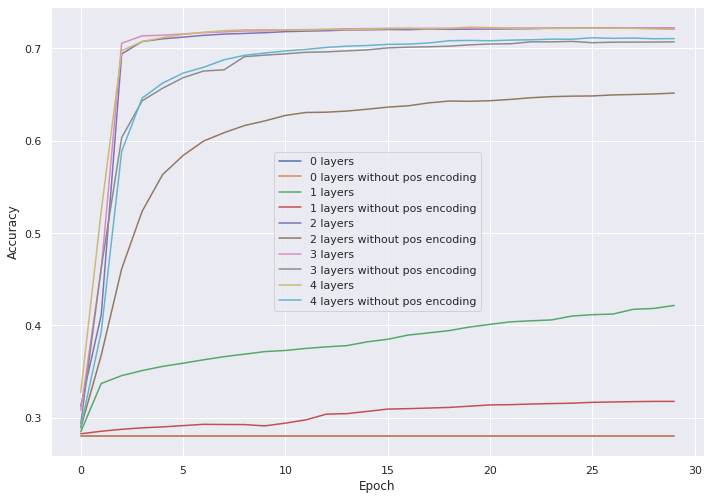

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=acc_0layers, label='0 layers')
sns.lineplot(data=acc_0layers_wpe, label='0 layers without pos encoding')
sns.lineplot(data=acc_1layers, label='1 layers')
sns.lineplot(data=acc_1layers_wpe, label='1 layers without pos encoding')
sns.lineplot(data=acc_2layers, label='2 layers')
sns.lineplot(data=acc_2layers_wpe, label='2 layers without pos encoding')
sns.lineplot(data=acc_3layers, label='3 layers')
sns.lineplot(data=acc_3layers_wpe, label='3 layers without pos encoding')
sns.lineplot(data=acc_4layers, label='4 layers')
sns.lineplot(data=acc_4layers_wpe, label='4 layers without pos encoding')
sns.set_style("darkgrid")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

In [205]:
def generate(model, method='sample'):
    s = []
    x = torch.zeros([1, 1], dtype=torch.int64, device=DEVICE)
    s.append(x[0][0].item())
    cache = model.get_empty_cache(1)
    for i in range(64):
      dist, cache = model(x, cache, offset=i)
      if (method == 'sample'):
        x = dist.sample()
      else:
        x = take_most_probable(dist)
        x.reshape([1, 1])

      s.append(x[0][0].item())
    return s

In [206]:
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model.to(DEVICE)
_ = train(model, TRAIN_LOADER, TEST_LOADER, 10)

EPOCH 0 loss:2.168278603614131 acc:0.3240
EPOCH 1 loss:1.9360980791381643 acc:0.3813
EPOCH 2 loss:1.3014214031303986 acc:0.6782
EPOCH 3 loss:0.8530074237268183 acc:0.7045
EPOCH 4 loss:0.7912353352655338 acc:0.7100
EPOCH 5 loss:0.7644677999653394 acc:0.7104
EPOCH 6 loss:0.7471614034870003 acc:0.7153
EPOCH 7 loss:0.7351464282108259 acc:0.7187
EPOCH 8 loss:0.7271979111659376 acc:0.7203
EPOCH 9 loss:0.7209353514864475 acc:0.7219


In [210]:
print("Sentence generated with max method: ")
print(generate(model, method='max'))
print("Sentence generated with sampling method: ")
print(generate(model, method='sample'))
print("Sentence generated with sampling method again: ")
print(generate(model, method='sample'))
print("Sentence generated with sampling method again and again: ")
print(generate(model, method='sample'))


Sentence generated with max method: 
[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 0, 1, 3, 4, 0, 0, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 3, 4, 0, 1, 2, 3, 4, 0, 0, 1, 3, 4]
Sentence generated with sampling method: 
[0, 2, 3, 4, 0, 0, 1, 7, 0, 1, 6, 3, 6, 1, 3, 1, 3, 3, 4, 3, 6, 0, 1, 4, 3, 0, 1, 0, 0, 0, 1, 3, 7, 0, 1, 4, 0, 0, 1, 4, 0, 1, 7, 4, 5, 3, 7, 0, 0, 1, 9, 0, 0, 1, 7, 3, 2, 0, 1, 4, 0, 1, 3, 0, 1]
Sentence generated with sampling method again: 
[0, 7, 2, 3, 0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 4, 9, 4, 6, 1, 4, 3, 0, 1, 3, 0, 1, 4, 7, 1, 0, 1, 0, 1, 4, 5, 3, 4, 7, 8, 0, 1, 0, 1, 8, 0, 0, 1, 3, 4, 9]
Sentence generated with sampling method again and again: 
[0, 3, 0, 0, 1, 5, 8, 3, 1, 6, 3, 5, 6, 4, 5, 0, 4, 0, 1, 8, 0, 1, 4, 0, 1, 4, 5, 0, 0, 0, 1, 2, 3, 6, 0, 0, 0, 1, 9, 0, 0, 0, 1, 8, 0, 1, 5, 0, 0, 0, 1, 6, 0, 0, 1, 2, 3, 7, 9, 0, 1, 6, 5, 0, 0]


## Attention visualizations (optional)